# [Misplaced Priorities - Part 4](https://xpuzzlecorner.substack.com/p/misplaced-priorities-part-4)
## January 26, 2025

## Problem

_Recall that in the last three parts we were considering how to order passengers correctly in order to efficiently board a plane. You consider for a moment that maybe ordering the passengers isn’t worth it so you decide to analyze how quickly you can board the plane if the passengers are in a random order._ 

_Let’s assume that we are boarding a rather strange and simplified plane with only one seat per row. Passengers are ordered randomly and each requires a fixed amount of time Δt to stow their luggage. Passengers can move between rows quickly enough that we can ignore the time it takes for them to move in the aisle. However, as we have all experienced, the aisles of planes are never large enough for you to get around someone who is stowing their luggage so if the person in front of you is in the middle of stowing, you must wait until they are done before you can proceed. For sipmlicity, we will also assume (rather innacuraly) that people are small compared to the sizThe question is, how long does it take for a plane with 10 seats and 10 randomly ordered passengers to board.  What about n seats and n passengers?_

## Solution

Just to wrap our head around this problem a bit, let's consider the best and the worst case scenarios. In the best case, everybody is already in order and we can just walk in and sit down. Let's call this order [1, 2, ... , n]. This will take time $\Delta_t$. In the worst case, everybody is in the reverse order and we have to wait for each person to sit down before the next person can sit down. Let's call this order [n, n-1, ... , 1]. This will take time $n\Delta_t$.

Ok, in terms of a given order/permutation, what causes a delay? A delay happens when you have a person assigned to seat i in a position before another person assigned to a seat j where i > j. In this case, the person assigned to seat j has to wait for the person assigned to seat i to sit down before they can sit down.

So that's the case when we only consider 2 people. What about 3 people? Let's consider the permutations:

$$
\begin{align*}
\text{Case 1: } [1, 2, 3] & \rightarrow \Delta_t \\
\text{Case 2: } [1, 3, 2] & \rightarrow 2\Delta_t \\
\text{Case 3: } [2, 1, 3] & \rightarrow 2\Delta_t \\
\text{Case 4: } [2, 3, 1] & \rightarrow 2\Delta_t \\
\text{Case 5: } [3, 1, 2] & \rightarrow 2\Delta_t \\
\text{Case 6: } [3, 2, 1] & \rightarrow 3\Delta_t \\
\end{align*}
$$

So what's going on here? When do we get a blockage? It's pretty clear that we get a blockage when we have a person assigned to seat i in a position before another person assigned to a seat j where i > j but we have a second blockage in case 6. Let's see if consider the permutations for 4 people helps clarify things:

$$
\begin{align*}
\text{Case 1: } [1, 2, 3, 4] & \rightarrow \Delta_t \\
\text{Case 2: } [1, 2, 4, 3] & \rightarrow 2\Delta_t \\
\text{Case 3: } [1, 3, 2, 4] & \rightarrow 2\Delta_t \\
\text{Case 4: } [1, 3, 4, 2] & \rightarrow 2\Delta_t \\
\text{Case 5: } [1, 4, 2, 3] & \rightarrow 2\Delta_t \\
\text{Case 6: } [1, 4, 3, 2] & \rightarrow 3\Delta_t \\
\text{Case 7: } [2, 1, 3, 4] & \rightarrow 2\Delta_t \\
\text{Case 8: } [2, 1, 4, 3] & \rightarrow 2\Delta_t \\
\text{Case 9: } [2, 3, 1, 4] & \rightarrow 2\Delta_t \\
\text{Case 10: } [2, 3, 4, 1] & \rightarrow 2\Delta_t \\
\text{Case 11: } [2, 4, 1, 3] & \rightarrow 2\Delta_t \\
\text{Case 12: } [2, 4, 3, 1] & \rightarrow 3\Delta_t \\
\text{Case 13: } [3, 1, 2, 4] & \rightarrow 2\Delta_t \\
\text{Case 14: } [3, 1, 4, 2] & \rightarrow 2\Delta_t \\
\text{Case 15: } [3, 2, 1, 4] & \rightarrow 3\Delta_t \\
\text{Case 16: } [3, 2, 4, 1] & \rightarrow 3\Delta_t \\
\text{Case 17: } [3, 4, 1, 2] & \rightarrow 2\Delta_t \\
\text{Case 18: } [3, 4, 2, 1] & \rightarrow 3\Delta_t \\
\text{Case 19: } [4, 1, 2, 3] & \rightarrow 2\Delta_t \\
\text{Case 20: } [4, 1, 3, 2] & \rightarrow 3\Delta_t \\
\text{Case 21: } [4, 2, 1, 3] & \rightarrow 3\Delta_t \\
\text{Case 22: } [4, 2, 3, 1] & \rightarrow 3\Delta_t \\
\text{Case 23: } [4, 3, 1, 2] & \rightarrow 3\Delta_t \\
\text{Case 24: } [4, 3, 2, 1] & \rightarrow 4\Delta_t \\
\end{align*}
$$

Ok, so what's going on here? We have a blockage when we have a person assigned to seat i in a position before another person assigned to a seat j where i > j. But we also have a blockage when we have a person assigned to seat j in a position before another person assigned to a seat k where j > k. If we extent this idea, we can construct a blockage chain where each person assigned to a seat $i$ is in a position before another person assigned to a seat $j$ where $i > j$. The time it takes to board the plane is the length of the longest blockage chain.

This ends up being a classic problem in computer science called the [Longest Increasing Subsequence](https://en.wikipedia.org/wiki/Longest_increasing_subsequence). In our case, we care about the longest _decreasing_ subsequence.

Ok, with that in mind, we need to figure out expected length of the longest decresing subsequence (LDS) of a random permutation. There are, of course, a variety of ways to determine the LDS of a given permutation but given that there are $n!$ permutations on a set of $n$ elements, it would behoove us to find a more efficient way to calculate the LDS. After a number of attempts using graphs and various simple alogorithms and attempting to apply counting methods on them, I hadn't found a way to get around the need to generate all $n!$ permutations and calculate the LDS for each one. Admittedly, I had to do some research to find some relevant and combinatorial objects that could help me out.

While looking at some of the research on the asymptotic behavior of the LDS, I came across the concept of [Young tableaux](https://en.wikipedia.org/wiki/Young_tableau). The Young tableaux has many important properties that make it useful for our purposes. First, the way a Young Tableaux is generated yields a LDS of a sequence! Second, there is a bijection between the set of Young tableaux and the set of permutations. When we couple that fact with there ends up being a simple way to count all the Young tableaux of a given shape, we find that there is now an easier way to compute the number of LDS with size $i$ which is exactly what we need to calculate the expected length of the LDS.

So let's dive into the Young tableaux. First, A Young Diagram is a way to represent a partition of a number $n$. When elements are assigned to the boxes of the Young Diagram according to a specific process (see below) it becomes a Young tableaux. In our case, we're partitioning the elements ${1, 2, ... , n}$ into subsequences such that each subsequence is decreasing and the largest such subsequence is the LDS. Traditionally, the Young tableaux features _increasing_ subsequences which is completely fine since, by symmetry, the expected length of the LDS is the same as the expected length of the LIS.

Example: The Young tableaux for the permutation [2, 4, 1, 3, 5] is:

$$
\begin{array}{cccc}
1 & 3 & 5 \\
2 & 4 \\
\end{array}
$$


The fact that each subsequence is increasing is a consequence of how the Young tableaux is generated. The process for generating a Young tableaux is as follows:

1. Start with an empty tableau.
2. Starting from the first row, insert each element in the permutation in order. 
 - If it’s larger than all the elements in the row, append it to the end of the row. 
 - If it’s smaller than or equal to some element in the row, "bump" the smallest element greater than or equal to it down to the next row.
3. Repeat step 2 until all elements are inserted.

The tableaux also has the feature that the entries of each column are also increasing, which will end up being very useful when we need to count the number of Young tableaux of a given shape. On that note, Young tableaux are typically described by their shape, which is equivalent to the partition of the number $n$. The shape is size of each partition of $n$ in decreasing order. The shape of the Young tableaux above is $\lambda = [3, 2]$. 

So, at this point, to compute the expected length of the LDS, we need to generate the Young diagram for each partition of $n$ and then count the number of Young tableaux of that shape. Generating the partitions of $n$ has time complexity $e^{O(\sqrt{n})}$ which is not great but it's better than $n!$. So as long as we can count the number of Young tableaux of a given shape somewhat efficiently, we should still be doing better then brute force enumeration.

But how many valid Young tableaux are there of a given shape? Here again I needed to rely on the literature, which after consulting, I realized it was good that I did. The number of Young tableaux of a given shape is given by the [hook length formula](https://en.wikipedia.org/wiki/Hook_length_formula) and while the inductive proof of that the formula works is relatively simple, it presumes that we already know the hook length formula. There are combinatorial proofs but they are pretty involved and took many years to discover after the formula was first published. There was now way I was going to come up with it for this problem :)

Back to the point though, the hook length formula is given by:

$$
\text{Number of Young tableaux of shape } \lambda = \frac{n!}{\prod_{(i, j) \in \lambda} h(i, j)}
$$

where $h(i, j)$ is the hook length of the box in row $i$ and column $j$. The hook length is the number of boxes in the Young diagram that are below and to the right of the box $(i, j)$ plus 1.

We will also need to make use of the [Robinson-Schensted Correspondence](https://en.wikipedia.org/wiki/Robinson%E2%80%93Schensted_correspondence) which tells us that the number of permutations associated with a given Young tableaux is the square of the number of Young tableaux of that shape. This will allow us to calculate the expected length of the LDS.

This can be calculated in (I think) $O(n)$ time so we should still be well below the $n!$ time complexity of brute force enumeration. Of course, this approach doesn't yeild a tidy closed form solution but it does yield an exact solution. Below is the code to compute the answer for a given $n$.


In [34]:
from math import factorial
from functools import reduce
from operator import mul
from collections import Counter

def generate_partitions(n):
    def helper(n, max_part):
        if n == 0:
            return [[]]
        if max_part == 0:
            return []
        current_max = min(max_part, n)
        with_current = [
            [current_max] + part 
            for part in helper(n - current_max, current_max)
        ] if current_max > 0 else []
        without_current = helper(n, current_max - 1)
        return with_current + without_current
    return helper(n, n)

def hook_length(partition, row, col):
    to_the_right = partition[row] - (col + 1)
    below = 0
    for r in range(row + 1, len(partition)):
        if partition[r] > col:
            below += 1
    return to_the_right + below + 1

def hook_length_formula(partition):
    n = sum(partition)
    hook_product = 1
    for row in range(len(partition)):
        for col in range(partition[row]):
            hook_product *= hook_length(partition, row, col)
    return factorial(n) // hook_product

def longest_increasing_subsequence(partition):
    return max(partition)

n = 10
denom = factorial(n)
partitions = generate_partitions(n)
weighted_sum = 0
for p in partitions:
    num_tableaux = hook_length_formula(p)
    lis = longest_increasing_subsequence(p)
    weighted_sum += (num_tableaux ** 2) * lis

print(f"E[|LIS|] = {weighted_sum}/{denom} = {weighted_sum / denom}")

[[10], [9, 1], [8, 2], [8, 1, 1], [7, 3], [7, 2, 1], [7, 1, 1, 1], [6, 4], [6, 3, 1], [6, 2, 2], [6, 2, 1, 1], [6, 1, 1, 1, 1], [5, 5], [5, 4, 1], [5, 3, 2], [5, 3, 1, 1], [5, 2, 2, 1], [5, 2, 1, 1, 1], [5, 1, 1, 1, 1, 1], [4, 4, 2], [4, 4, 1, 1], [4, 3, 3], [4, 3, 2, 1], [4, 3, 1, 1, 1], [4, 2, 2, 2], [4, 2, 2, 1, 1], [4, 2, 1, 1, 1, 1], [4, 1, 1, 1, 1, 1, 1], [3, 3, 3, 1], [3, 3, 2, 2], [3, 3, 2, 1, 1], [3, 3, 1, 1, 1, 1], [3, 2, 2, 2, 1], [3, 2, 2, 1, 1, 1], [3, 2, 1, 1, 1, 1, 1], [3, 1, 1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2], [2, 2, 2, 2, 1, 1], [2, 2, 2, 1, 1, 1, 1], [2, 2, 1, 1, 1, 1, 1, 1], [2, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
E[|LIS|] = 15730705/3628800 = 4.33496059303351


In [30]:
import random
import statistics
from bisect import bisect_left

def lis_length(sequence):
    """
    Returns the length of the longest increasing subsequence in `sequence`.
    Uses a classic O(n log n) approach with a patience-like method.
    """
    # 'tails' will store the smallest possible tail value
    # for an increasing subsequence of each length.
    tails = []
    for x in sequence:
        # Find the position where x can be placed
        # in the tails array.
        i = bisect_left(tails, x)
        # If x is bigger than all tails, add a new tail.
        if i == len(tails):
            tails.append(x)
        # Otherwise, replace the tail with x.
        else:
            tails[i] = x
    return len(tails)

def simulate_lis(n, trials=100_000):
    """
    Generates 'trials' random permutations of length n,
    computes the LIS length of each, and returns the average.
    """
    total = 0
    for _ in range(trials):
        # random.sample(range(n), n) creates a random permutation of 0..n-1
        permutation = random.sample(range(n), n)
        total += lis_length(permutation)
    return total / trials

# Example usage:
if __name__ == "__main__":
    n = 10
    num_trials = 200_000
    estimated_lis = simulate_lis(n, num_trials)
    print(f"For n={n}, estimated average LIS after {num_trials} trials ≈ {estimated_lis:.3f}")


For n=10, estimated average LIS after 200000 trials ≈ 4.338


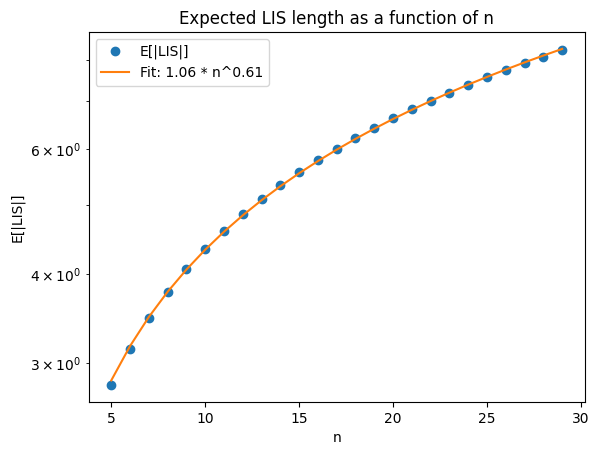

In [37]:
ns = range(5, 30, 1)
ans = []
for n in ns:
    denom = factorial(n)
    partitions = generate_partitions(n)
    weighted_sum = 0
    for p in partitions:
        num_tableaux = hook_length_formula(p)
        lis = longest_increasing_subsequence(p)
        weighted_sum += (num_tableaux ** 2) * lis
    ans.append(weighted_sum / denom)

# Plot results and fit a power law function to them
from matplotlib import pyplot as plt
import numpy as np

plt.plot(ns, ans, 'o', label='E[|LIS|]')
plt.xlabel('n')
plt.ylabel('E[|LIS|]')
plt.yscale('log')
plt.title('Expected LIS length as a function of n')

# Fit a power law function to the data
def power_law(x, a, b):
    return a * x ** b

popt, _ = np.polyfit(np.log(ns), np.log(ans), 1, w=np.sqrt(ans), cov=True)
a, b = np.exp(popt[1]), popt[0]
plt.plot(ns, power_law(ns, a, b), label=f'Fit: {a:.2f} * n^{b:.2f}')

plt.legend()
plt.show()

This code isn't efficient enough to push the $n$ out far enough to observe the asymptotic behavior of $2\sqrt{n}$ but it's a start.